In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import calendar
import datetime

# Question 2

In this question, I will visualize the datasets by examining how many visitors visit these restaurants each month. I will use a bar plot to give details about how many visitors the two websites recorded for each month, and I will use a line plot to show the trend of the recorded data.

1. Prepare the dataset

In [30]:
air_visits = pd.read_csv('Data/air_reserve.csv')
hpg_visits = pd.read_csv('Data/hpg_reserve.csv.gz', compression='gzip')
store_id_relations = pd.read_csv('Data/store_id_relation.csv')

2. Scrape the results

In [31]:
hpg_store_ids = list(store_id_relations['hpg_store_id'])
air_store_ids = list(store_id_relations['air_store_id'])

hpg_selected_stores = hpg_visits[hpg_visits.hpg_store_id.isin(hpg_store_ids)][hpg_visits.visit_datetime < '2017']

air_selected_stores = air_visits[air_visits.air_store_id.isin(air_store_ids)][air_visits.visit_datetime < '2017']

hpg_total = sum(hpg_selected_stores['reserve_visitors'])
air_total = sum(air_selected_stores['reserve_visitors'])

/Users/leonard/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/leonard/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


3. Plot the results

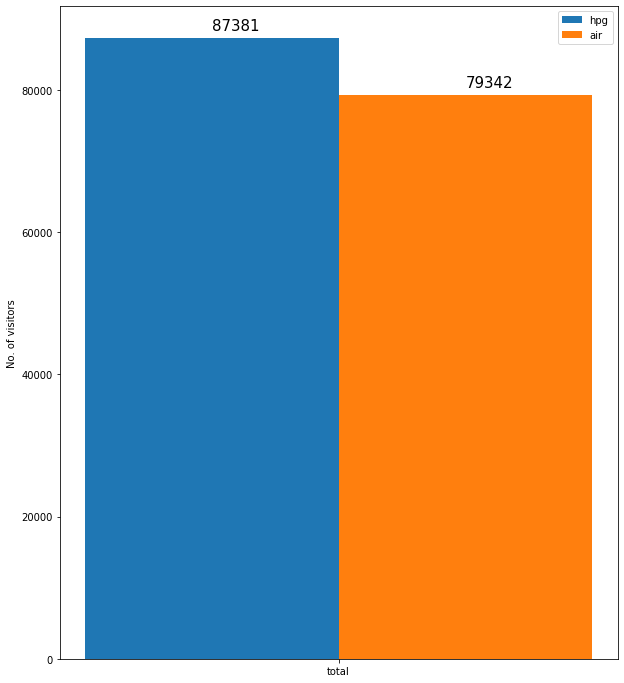

In [32]:
width = 0.15

fig, ax = plt.subplots(figsize=(10,12))
ax.bar(-width/2, [hpg_total], width, label='hpg')
ax.bar(width/2, [air_total], width, label='air')
ax.set_xticks(np.arange(1))
ax.set_xticklabels(['total'])
ax.text(-0.075, hpg_total + 1000, str(hpg_total), fontsize=15)
ax.text(0.075, air_total + 1000, str(air_total), fontsize=15)
ax.legend()
ax.set_ylabel('No. of visitors')
plt.show()

# Conclusion

From the two plots, we can see that the total number of visitors generated by hpg website is 8000 more than the number of visitors generated by air website. 

# Question 3


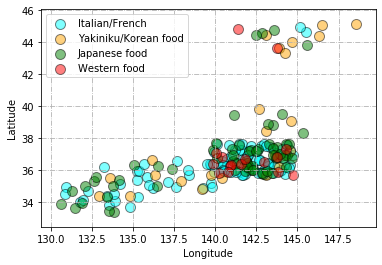

In [33]:
air_store_info = pd.read_csv(os.path.join(os.getcwd(), 'Data', 'air_store_info.csv'))

# Remove entries we do not consider. Here we look at 4 styles:
# Italian/French, Japanese, Western, Korean
target_styles = ['Italian/French', 'Yakiniku/Korean food', 'Japanese food', 'Western food']
style_colors = ['aqua', 'orange', 'green', 'red']

for style,color in zip(target_styles, style_colors):
    target_style = air_store_info[air_store_info.air_genre_name == style]
    longitude_noise = 5 * np.random.rand(len(target_style)) + target_style['longitude']
    latitude_noise = 2 * np.random.rand(len(target_style)) + target_style['latitude']
    plt.scatter(longitude_noise, latitude_noise, label=style, edgecolors='k', alpha=0.5, s=100, c=color)

plt.legend()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(linestyle='-.')
plt.show()

# Conclusion

From this plot, we can see that most restaurants from all four categories are clustered between longitude 140-145 and latitude 36-38. This suggests that there might be a large shopping mall in this particular area.  

For other areas, we see that between longitude 130-140 and latitude 34-38 there is small clusters of restaurants, which are mainly *Italian/French* and *Japanese*, with a few *Yakiniku/Korean* restaurants among them. Hence it might be the case where this area is a prosperous area, likely a town center.  

At last, there are a few restaurants lies between longitude 140-150 and 42-46. Since the restaurants there are mostly *Yakiniku/Korean*, that area might be a Korean-town. 

# Question 4

We will use the results from Q2 to plot the result:

In [34]:
air_visit_data = pd.read_csv('Data/air_visit_data.csv')
air_store_id_month_list = {
    '2016-01':[], 
    '2016-02':[],
    '2016-03':[],
    '2016-04':[],
    '2016-05':[],
    '2016-06':[],
    '2016-07':[],
    '2016-08':[],
    '2016-09':[],
    '2016-10':[],
    '2016-11':[],
    '2016-12':[],
    '2017-01':[],
    '2017-02':[],
    '2017-03':[],
    '2017-04':[]
}
visitors_month = [0 for i in range(16)]
month_labels = ['2016-01','2016-02','2016-03','2016-04','2016-05','2016-06','2016-07','2016-08','2016-09','2016-10','2016-11','2016-12','2017-01','2017-02','2017-03','2017-04']
for date, store_id, visitors in zip(air_visit_data['visit_date'], air_visit_data['air_store_id'], air_visit_data['visitors']):
    month = date[:7]
    air_store_id_month_list[month].append(store_id)
    visitors_month[month_labels.index(month)] += visitors
for i in range(16):
    visitors_month[i] = visitors_month[i] // (len(set(air_store_id_month_list[month_labels[i]])))

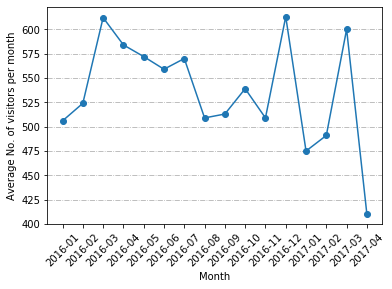

In [35]:
plt.plot(month_labels, visitors_month, marker='o')
plt.xlabel('Month')
plt.ylabel('Average No. of visitors per month')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='-.')
plt.show()

# Conclusion:  

From 2016-01 to 2016-03, the mean number of visitors increases quickly to a peak value (over 600). After that, the mean number drops for 5 months until 2016-08, where it returns to almost the same value on 2016-01. From 2016-08 to 2016-11, the mean number is stable except for a small fluctuation between 2016-09 and 2016-11. Then on 2016-12 the number climbed high to over 600, before it drops even more significantly to around 475 on 2017-01. From then on the variation is large, with peak reached again on 2017-03 before dropping to only over 400 on 2017-04.  

Overall, we see that the mean number per month increases for the first three months (peak reached on March), then drops until August. At the end of the year there is an increase and the peak value is reached on December, and then drops to bottom on January.

# Question 5

1. Calculate visitors for each day

In [36]:
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_visitors = [0 for i in range(len(weekdays))]

def get_weekday(this_date):
    return calendar.weekday(int(this_date[:4]), int(this_date[5:7]), int(this_date[8:10]))

list_weekday = list(hpg_visits['visit_datetime'])
list_weekday = list(map(get_weekday, list_weekday))
for i, visitors in zip(list_weekday, hpg_visits['reserve_visitors']):
    weekday_visitors[i] += visitors


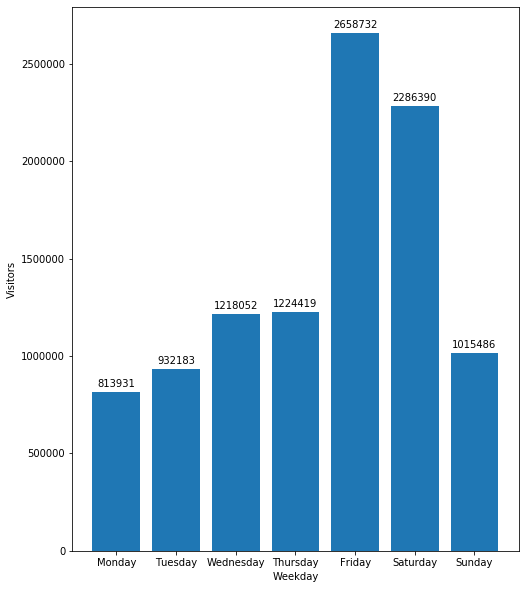

In [37]:
fig, ax = plt.subplots(1,1,figsize=(8,10))
rects = ax.bar(weekdays, weekday_visitors)
ax.set_xlabel('Weekday')
ax.set_ylabel('Visitors')
for rect in rects:
    height = rect.get_height()
    ax.annotate('{}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height),
               xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
plt.show()

**Conclusion** 

From the bar chart, we can see that most visitors go to restaurants on Friday and Saturday, which served about 2.5M and 2.2M customers respectively.  

In contrast, the five other days only served about half that number of customers compared to Friday and Saturday. It is worth noticing Sunday only served around 1M customers, since it is in the weekend when most people have the free time to eat in restaurants.  

For the weekdays, the number of visitors shows a growing trend from Monday to Friday, with Monday less than 1M to Friday over 2.5M.

# Question 6

1. Calculate the time interval

In [38]:
def interval(vis_date, res_date):
    vis = datetime.datetime.strptime(vis_date, '%Y-%m-%d %H:%M:%S')
    res = datetime.datetime.strptime(res_date, '%Y-%m-%d %H:%M:%S')
    delta = vis - res
    return delta.days * 24 + delta.seconds / 3600

In [39]:
air_reserve = pd.read_csv('Data/air_reserve.csv')
store_style = {}
style_time = {}

for id_str, genre in zip(air_store_info['air_store_id'], air_store_info['air_genre_name']):
    store_style[id_str] = genre
        
for id_str, vis, res in zip(air_reserve['air_store_id'], air_reserve['visit_datetime'], air_reserve['reserve_datetime']):
    time_diff = interval(vis, res)
    if style_time.get(store_style[id_str]) is None:
        style_time[store_style[id_str]] = [time_diff]
    else:
        style_time[store_style[id_str]].append(time_diff) 
        
style_time['Japanese food'].sort()
style_time['Italian/French'].sort()
style_time['Yakiniku/Korean food'].sort()
style_time['Western food'].sort()

def statistics():
    types = ['Japanese food', 'Italian/French', 'Yakiniku/Korean food', 'Western food']
    for style in types:
        style_time[style].sort()
        print(style + ":")
        print("Upper quartile:", style_time[style][len(style_time[style]) // 4 * 3])
        print("Median quartile:", style_time[style][len(style_time[style]) // 2])
        print("Lower quartile:", style_time[style][len(style_time[style]) // 4])
        print()

statistics()

Japanese food:
Upper quartile: 200.0
Median quartile: 51.0
Lower quartile: 3.0

Italian/French:
Upper quartile: 168.0
Median quartile: 47.0
Lower quartile: 5.0

Yakiniku/Korean food:
Upper quartile: 122.0
Median quartile: 28.0
Lower quartile: 3.0

Western food:
Upper quartile: 146.0
Median quartile: 29.0
Lower quartile: 4.0



### Visualization Info:  

A pie chart will be used for visualization, and it will use 0-50, 50-100, 100-150, 150-200, 200-250, 250-300, 300-350, 350-400 and >400 to represent the sections. We use equal-sized intervals to make the results more comparable.

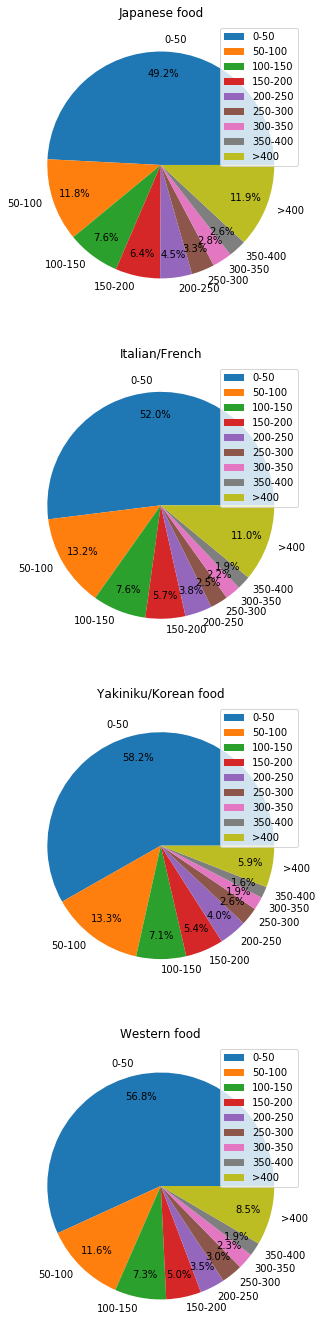

In [40]:
def pie(style):
    one = 1 / len(style_time[style]) * 100
    proportions = [0,0,0,0,0,0,0,0,0]
    for time_diff in style_time[style]:
        if time_diff < 50:
            proportions[0] += one
        elif time_diff < 100:
            proportions[1] += one
        elif time_diff < 150:
            proportions[2] += one
        elif time_diff < 200:
            proportions[3] += one
        elif time_diff < 250:
            proportions[4] += one
        elif time_diff < 300:
            proportions[5] += one
        elif time_diff < 350:
            proportions[6] += one
        elif time_diff < 400:
            proportions[7] += one
        else:
            proportions[8] += one
    return proportions

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1,figsize=(10,24))
label_list = ['0-50', '50-100', '100-150', '150-200', '200-250', '250-300', '300-350', '350-400', '>400']

for style,ax in zip(['Japanese food', 'Italian/French', 'Yakiniku/Korean food', 'Western food'], [ax1, ax2, ax3, ax4]):
    proportions = pie(style)
    ax.pie(proportions, labels=label_list, labeldistance=1.1, autopct="%1.1f%%", pctdistance=0.8)
    ax.legend(loc=1)
    ax.set_title(style)
    
plt.show()

**Conclusion**:

In general, we see that for all four styles around half of time differences is less than 50 hours, with *Japanese* the least (49.2%) and *Yakiniku/Korean* highest (58.6%).  

For the rest 8 sections, we see that they occupy less percentage as the time difference increases. Moreover the decreased percentage also decreases as time difference increases. Take *Japanese* as an example, the difference inn percentage of 50-100 and 100-150 is 4.2%, while the difference between 300-350 and 400-450 is only 0.2%. At last, although most time differences are small, we still see around 5-10% time differences that are greater than 400 hours. 


Overall, we see that most time differences are less than 50 hours. For larger time differences, the distribution becomes more even as the time difference increases. 